# CSE150A - Milestone 3

# Names

- Noah Danan
- Kenny Nguyen
- Yuliana Chavez

##Data Preproccessing##

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose

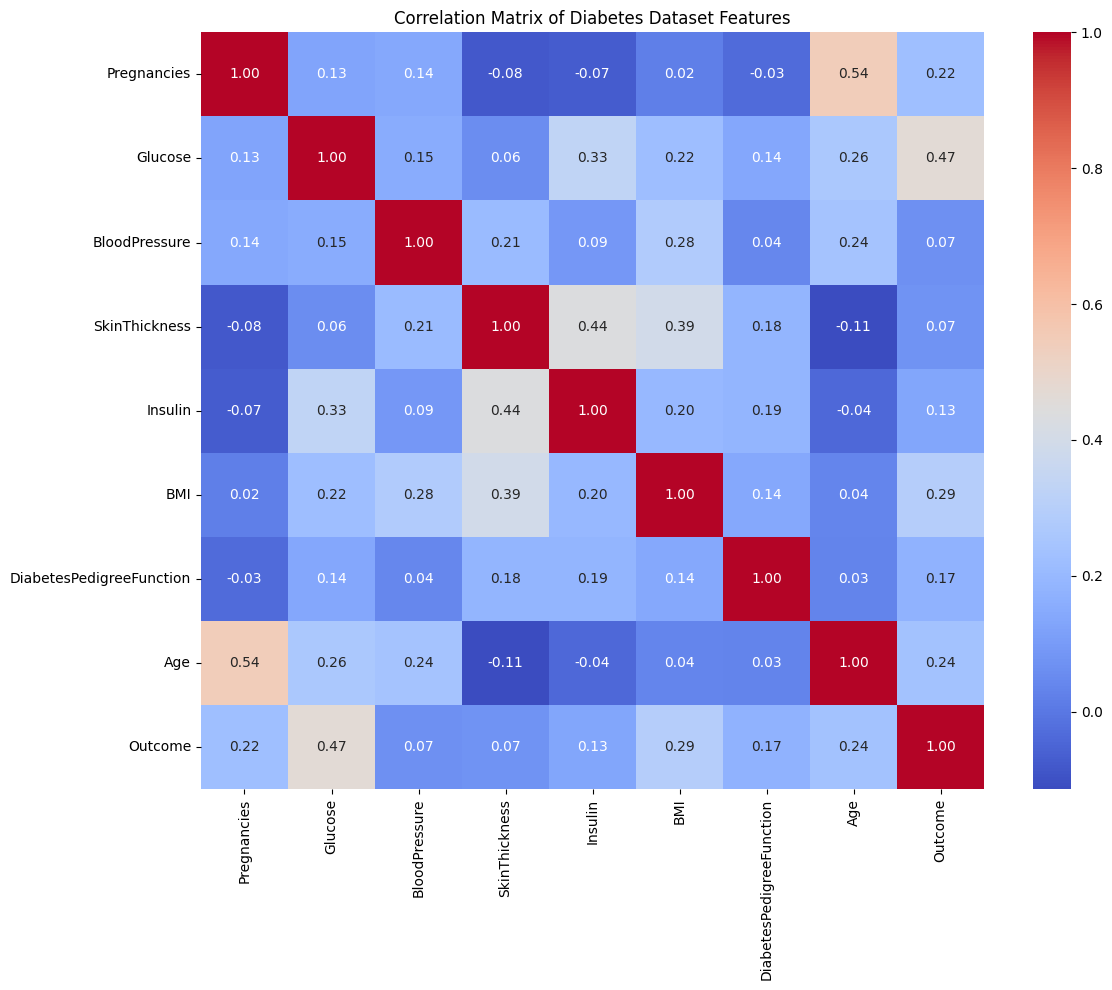

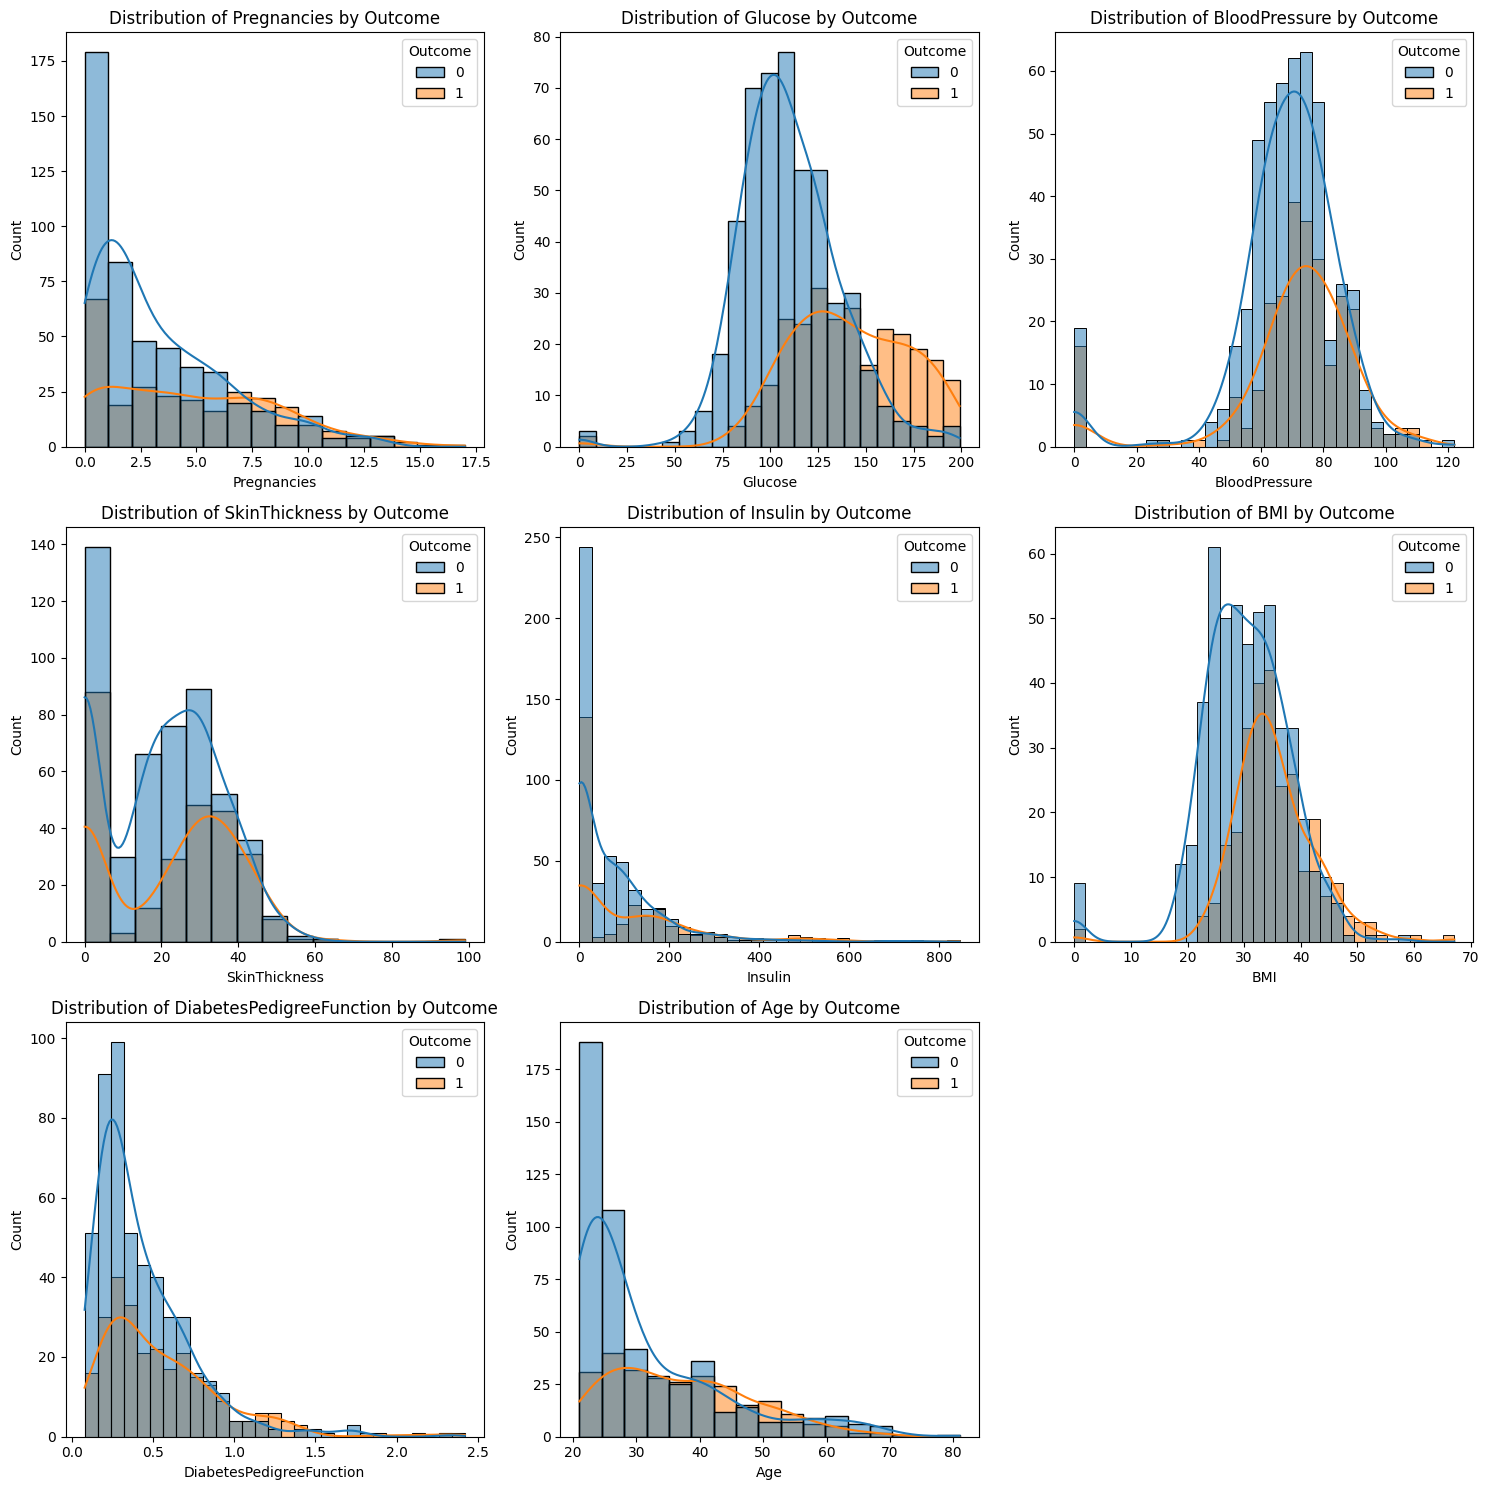

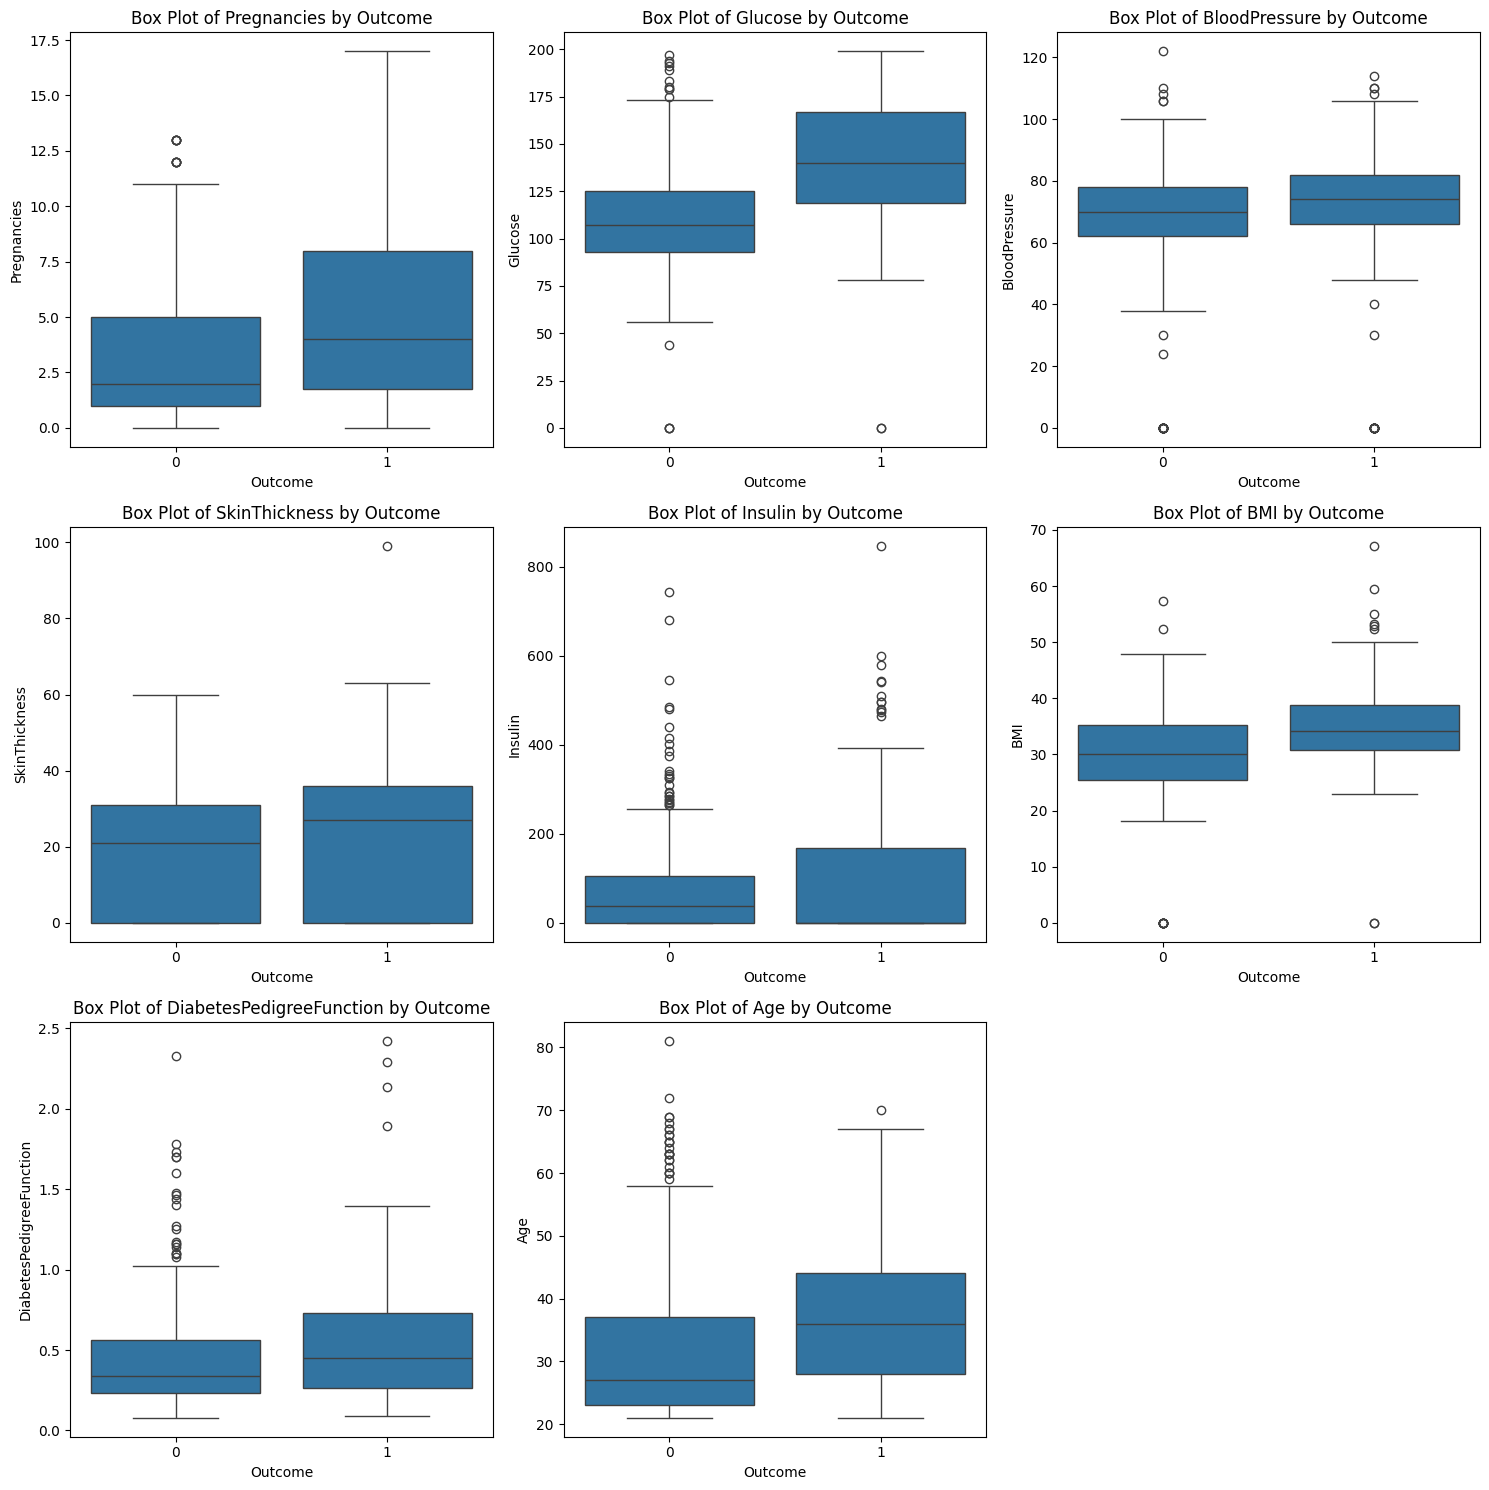


Missing Values After Zero Replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Model Accuracy: 75.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.7

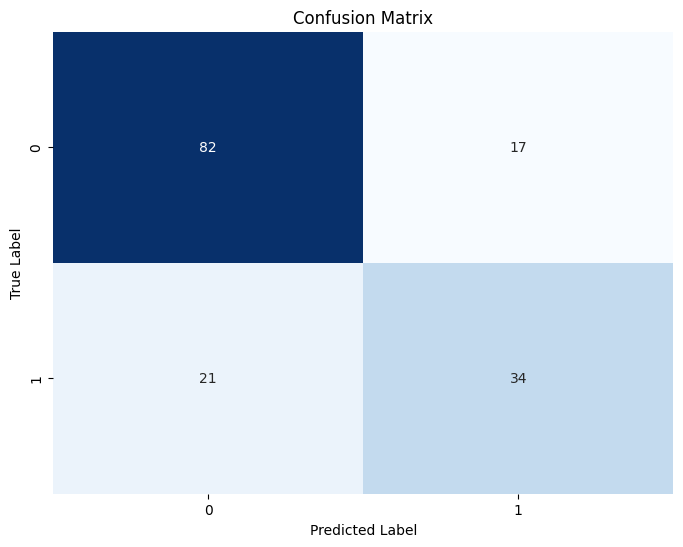

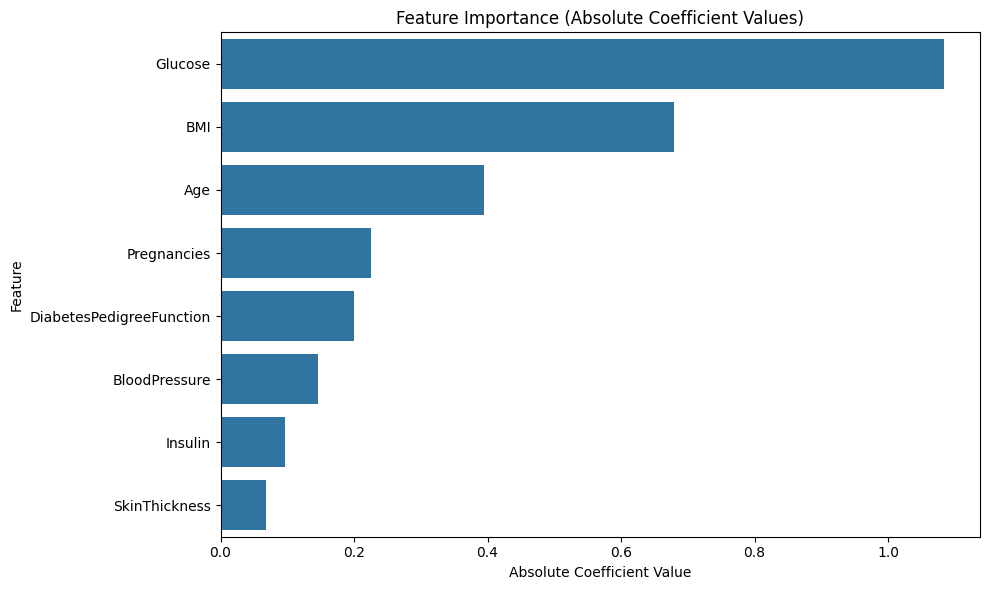


Example Prediction:
Diabetes Risk: Positive
Prediction Probability: 0.78

Multiple Sample Predictions:
Patient 1: Diabetes Risk - Negative, Probability: 0.06
Patient 2: Diabetes Risk - Positive, Probability: 0.70
Patient 3: Diabetes Risk - Negative, Probability: 0.04
Patient 4: Diabetes Risk - Positive, Probability: 0.88
Patient 5: Diabetes Risk - Negative, Probability: 0.12


C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
# Loading the dataset
# Note: You'll need to download this dataset from Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())

# Check basic info about the dataset
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)

# Exploratory Data Analysis
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.tight_layout()
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='Outcome', kde=True)
    plt.title(f'Distribution of {column} by Outcome')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box plots for each feature by outcome
plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Box Plot of {column} by Outcome')
plt.tight_layout()
plt.show()

# Replace zeros in certain columns with NaN as they likely represent missing values
# According to domain knowledge, these features shouldn't be zero
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_processed = df.copy()
for column in columns_to_process:
    df_processed[column] = df_processed[column].replace(0, np.NaN)

# Count missing values after replacement
print("\nMissing Values After Zero Replacement:")
print(df_processed.isnull().sum())

# Fill missing values with mean of respective column
for column in columns_to_process:
    df_processed[column] = df_processed[column].fillna(df_processed[column].mean())

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(df_processed.isnull().sum())

# Split features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Function to predict diabetes risk for a new patient
def predict_diabetes(patient_data):
    # Scale the patient data
    patient_data_scaled = scaler.transform([patient_data])
    # Make prediction
    prediction = model.predict(patient_data_scaled)[0]
    # Get probability
    probability = model.predict_proba(patient_data_scaled)[0][1]
    
    return "Positive" if prediction == 1 else "Negative", probability

# Example usage of the function
print("\nExample Prediction:")
# Sample data format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
sample_patient = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
result, probability = predict_diabetes(sample_patient)
print(f"Diabetes Risk: {result}")
print(f"Prediction Probability: {probability:.2f}")

# Testing multiple samples
sample_patients = [
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Expected: Negative
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],   # Expected: Positive
    [1, 89, 66, 23, 94, 28.1, 0.167, 21],  # Expected: Negative
    [0, 137, 40, 35, 168, 43.1, 2.288, 33], # Expected: Positive
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],   # Expected: Negative
]

print("\nMultiple Sample Predictions:")
for i, patient in enumerate(sample_patients):
    result, probability = predict_diabetes(patient)
    print(f"Patient {i+1}: Diabetes Risk - {result}, Probability: {probability:.2f}")

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.